In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Evaluation metrics for trained model
    
RETURN
------
    {EVALUATION-METRIC}.csv : csv file
        Evaluation metrics scores


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/{NN or CV}/{EXPERIMENT}/{EVALUATION-METRIC}.csv
'''

import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
from scripts import config as src
import numpy as np
import pandas as pd
import datetime as dt
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# FIGURE_TITLE_SIZE = 25
# SUBPLOT_TITLE_SIZE = 20
# LEGEND_TITLE_SIZE = 14
# FONT_SIZE = 12

FIGURE_TITLE_SIZE = 18
SUBPLOT_TITLE_SIZE = 16
LEGEND_TITLE_SIZE = 14
FONT_SIZE = 12


plt.rc('font', size=16)                # controls default text sizes
plt.rc('axes', titlesize=SUBPLOT_TITLE_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=LEGEND_TITLE_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FIGURE_TITLE_SIZE)  # fontsize of the figure title

# sns.set_palette(['#ae76a3','#882e72','#1965b0','#5289c7'
#                  ,'#60ab9e','#77b77d','#d1b541','#f1932d'
#                  ,'#e8601c','#df4828','#a5170e','#72190e'])

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [4]:
experiment = 'exper_immune'
# experiment = 'exper_melanoma'
# experiment = 'exper_pbmc'
# loc_output = os.path.join(src.DIR_REPORTS, 'performance', experiment)
loc_output = os.path.join(src.DIR_REPORTS, 'evaluate_rskf', experiment)
detail_='circuits**'
# detail_='pathways**'

loc_output

'/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune'

In [5]:
df_metric_overall = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'metrics_overall*{detail_}'))):
    print(i)
    df_metric_overall = pd.concat([df_metric_overall, pd.read_csv(i)])

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune/metrics_overall_circuits_1_layer_immune_new_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune/metrics_overall_circuits_2_layer_immune_new_Adam_relu.csv


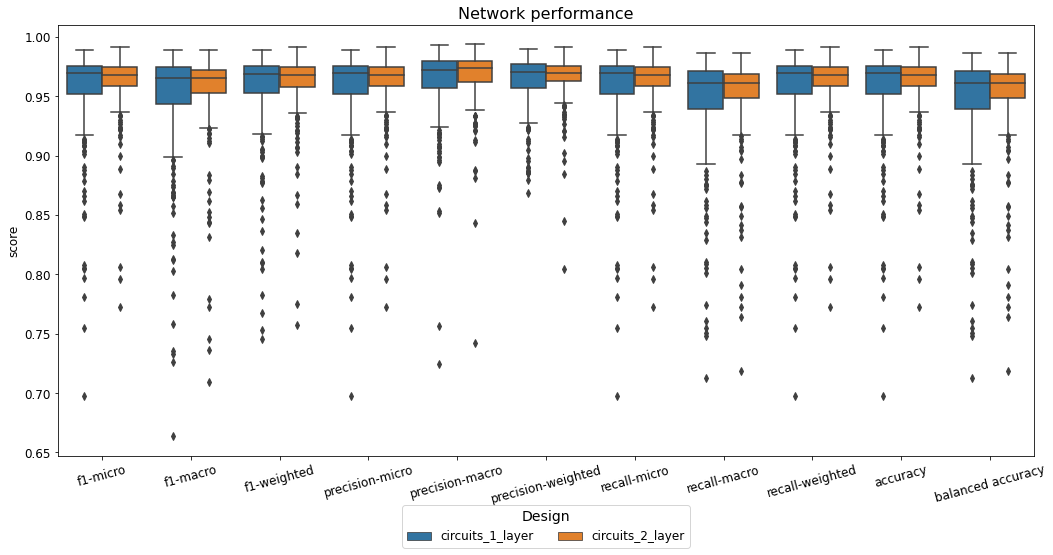

In [6]:
# sns.set_palette("tab10")
# sns.set_palette('colorblind', 12)
plt.figure(figsize=(15,8))
sns.boxplot(data=df_metric_overall, x='metric', y='score', hue='design');
plt.xticks(rotation=5)
plt.xlabel('')
# legend = plt.legend(title='Proposed network', loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=False, shadow=False, ncol=2)
# legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(1.15, 0.6))
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(.5, -0.1), ncol= 3 )
# legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
plt.xticks(rotation=15)
plt.title('Network performance')
plt.tight_layout();
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}.png')), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}.pdf')), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}.svg')), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}.tiff')), dpi=300, bbox_inches = 'tight', pad_inches=0.1)

In [7]:
df_metric_detail = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'metrics_*_detail*{detail_}*'))):
    print(i)
    df_metric_detail = pd.concat([df_metric_detail, pd.read_csv(i)])

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune/metrics_cell_type_detail_circuits_1_layer_immune_new_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune/metrics_cell_type_detail_circuits_2_layer_immune_new_Adam_relu.csv


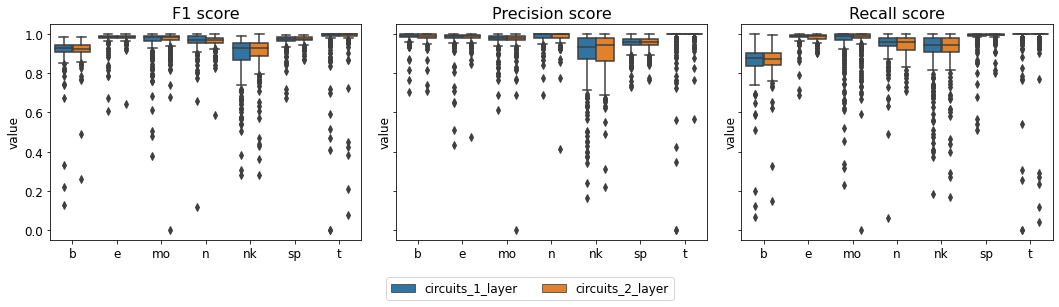

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4), sharex=True, sharey=True);
for i_metric, val_metric in enumerate(np.unique(df_metric_detail['metric'])):
    df_temp = df_metric_detail[df_metric_detail['metric']==val_metric]
    sns.boxplot(data=df_temp, x='variable', y='value', hue='design', ax=axes[i_metric]);
    axes[i_metric].set_title(f'{val_metric.capitalize()} score')
    axes[i_metric].set_xlabel('')
    axes[i_metric].set_xticklabels(axes[i_metric].get_xticklabels(), rotation=0)
    legend = axes[i_metric].get_legend()
    legend.remove()
    
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
# legend = plt.legend(title='Design', loc='lower center',  bbox_to_anchor=(-0.5, -0.5) )

plt.tight_layout();
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}.png'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}.pdf'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}.svg'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}.tiff'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)


In [9]:
df_metric_overall.groupby(['design'
                           , 'metric']).mean().reset_index().pivot(index='design'
                                                                   , columns='metric'
                                                                   , values='score')#.to_csv(os.path.join(loc_output, f'evaluate_all_{detail_}.csv'))

metric,accuracy,balanced accuracy,f1-macro,f1-micro,f1-weighted,precision-macro,precision-micro,precision-weighted,recall-macro,recall-micro,recall-weighted
design,,,,,,,,,,,
circuits_1_layer,0.956033,0.946000,0.948861,0.956033,0.955514,0.962703,0.956033,0.963154,0.946000,0.956033,0.956033
circuits_2_layer,0.962298,0.951721,0.956028,0.962298,0.961613,0.967675,0.962298,0.965915,0.951721,0.962298,0.962298


/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune/detail_circuits_1_layer_immune_new_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune/detail_circuits_2_layer_immune_new_Adam_relu.csv
DESIGN circuits_1_layer
DESIGN circuits_2_layer


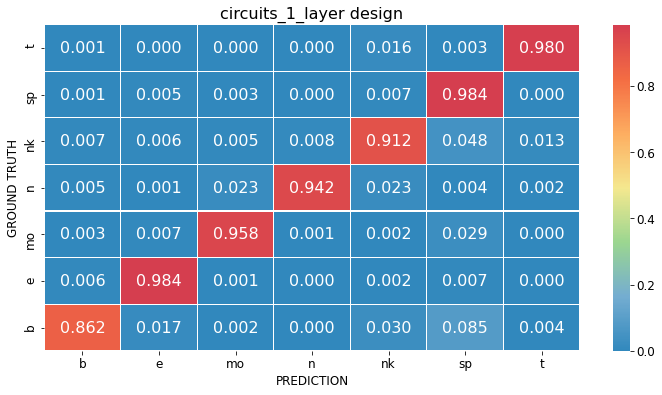

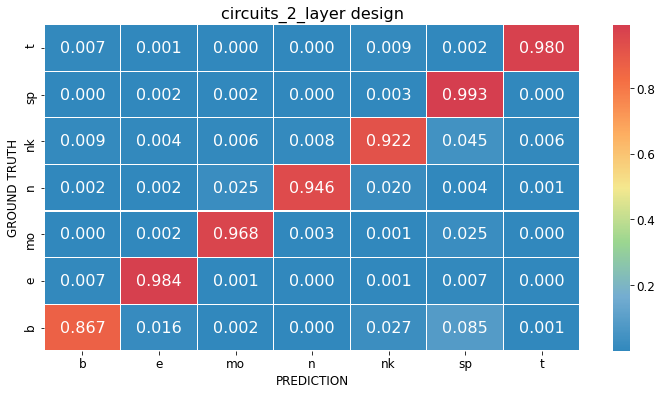

In [10]:
df_result = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'detail_*{detail_}*'))):
    print(i)
    df_result = pd.concat([df_result, pd.read_csv(i)])
    
for i_design in df_result['design'].unique():
    df_concat = pd.DataFrame()
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
#         print('experiment', i_exp)
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
#         print(len(df_temp))
        df_crosstab = pd.crosstab(df_temp['ground_truth'], df_temp['prediction']).div(df_temp['ground_truth'].value_counts(), axis=0)
#         df_concat = pd.concat([df_concat, df_crosstab])
        df_concat = df_concat.add(df_crosstab, fill_value=0)
#     print(i_exp+1)
    plot_cm = src.heatmap_cv(df_concat[::-1]/(i_exp+1), (i_design+' design'),fmt='.3f')
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.png'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.pdf'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.svg'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.tiff'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)